In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')

# Calculating $\pi$ with Monte Carlo



Assuming we can actually generate random numbers (a topic of philosophical and heated debates) we can populate a unit square with random points and determine the ratio of points inside and outside of a circle.

![Unit circle and unit square](../images/MonteCarloPi.gif)

![1/4 Unit circle and 1/4 unit square](../images/MonteCarloPi_rand.gif)


The ratio of the area of the circle to the square is:

$\frac{\pi r^{2}}{4r^{2}}=\frac{\pi}{4}$

So if we know the fraction of random points that are within the unit circle, then we can calculate $\pi$

(number of points in circle)/(total number of points)=$\pi/4$

In [25]:
from numpy.random import default_rng

In [26]:
rng = default_rng(42)

N = 1000

x = rng.random(N)
y = rng.random(N)

r = x**2 + y**2

np.sum(r < 1**2)/N*4

3.148

In this example with 1000 random x-, y-coordinates, we calculate the value of $\pi \approx 3.148$. The accuracy of this result is 

$accuracy = error = \frac{|3.148 - \pi|}{\pi} = 0.2\%$

What is the _precision_ of the result?

The precision is a measure of the range of expected values. So, we need more trials. 

In [27]:
rng = default_rng(41)

N = 1000

x = rng.random(N)
y = rng.random(N)

r = x**2 + y**2

np.sum(r < 1**2)/N*4

3.144

Using a `seed = 41`, the result is $\pi = 3.144$. So far we can report that $\pi = 3.146\pm0.002$ _if we use the average of the calculations and the range = max - min_. 

The key part of Monte Carlo methods is to use lots of random numbers to get better results. We can run the same analysis $100\times$ and see how much variation we get. 

Text(0.5, 1.0, 'Value of $\\pi=$3.140$\\pm$0.050')

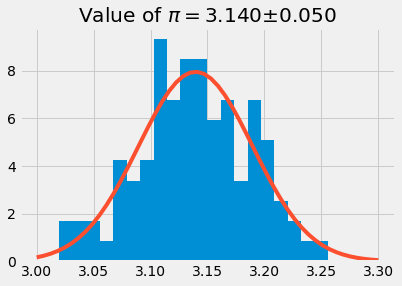

In [32]:
rng = default_rng(42)

N = 1000
trials = 100
pi_trial = np.zeros(trials)
for i in range(trials):
    x = rng.random(N)
    y = rng.random(N)

    r = x**2 + y**2

    pi_trial[i] = np.sum(r < 1**2)/N*4

mean_pi = np.mean(pi_trial)
std_pi = np.std(pi_trial)
plt.hist(pi_trial, 20, density=True)
x = np.linspace(3, 3.3)
pi_pdf = stats.norm.pdf(x, loc = mean_pi, scale = std_pi)
plt.plot(x, pi_pdf)
plt.title(r'Value of $\pi=${:1.3f}$\pm${:1.3f}'.format(mean_pi, std_pi))

In the plot above, we calculate $\pi$ 100 times using 1000 random x- and y-coordinates. The histogram has the data from the `pi_trial` and a normal distribution curve using the mean and standard deviation of `pi_trial`. 

Many random variables fit this distribution, called the normal distribution.

### Comparing with a normal distribution

A **normal** (or Gaussian) distribution is a special type of
distrubution that behaves as shown in the figure: 68% of the values are
within one standard deviation $\sigma$ from the mean; 95% lie within
$2\sigma$; and at a distance of $\pm3\sigma$ from the mean, you cover
99.7% of the values. This fact is known as the $3$-$\sigma$ rule, or
68-95-99.7 (empirical) rule.

![Normal distribution bell curve with 1st second and third standard
deviations marking out 68\%, 95\%, and 99.7\% of the distribution.](../images/std_bell_curve.svg)

####  Standard deviation and coverage in a normal distribution. Modified figure based on original from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg), the free media repository.


Many histograms don't follow the shape of a normal
distribution, known as *Bell Curve*. The calculated values of $\pi$ are centered on 
the mean value, and they are symetric with respect to it. They are _not_
 **skewed** to the right or left. A right (or positive) skewed distribution  looks like it's been pushed to the left: the right tail is longer and most of the values are concentrated on the left of the figure. Imagine that "right-skewed" means that a force from the right pushes on the curve.

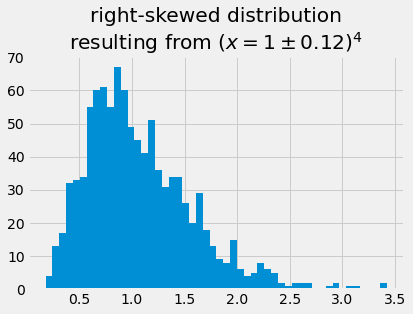

In [60]:
x4 = rng.normal(loc = 1, scale = 0.12, size = 1000)**4
plt.hist(x4, 50)
plt.title('right-skewed distribution\n'+r'resulting from $(x=1\pm0.12)^4$');

When the mean = mode and the histogram is symmetric, we typically report the mean, standard deviation and number of random numbers. 